In [ ]:
#librerias a usar
import pandas as pd
import numpy as np

In [ ]:
datos = pd.read_csv("exoplanets.csv")#se lee el csv
pide = datos.loc[:,["NAME","TEFF","MASS","A","DENSITY","R","STAR","MSTAR","RSTAR","BINARY"]]#se toman los valores pedidos

In [3]:
pide#se muestran los valores obtenidos

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0
...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN


In [4]:
sistemas_no_binarios=pide.query("BINARY != 1")#se descartan los sistemas binarios
#se eliminan los DF que no se usaran para ahorrar memoria
del(datos)
del(pide)

In [5]:
sistemas_no_binarios#se muestran los sistemas no binarios 

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0
...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN


In [6]:
#como los datos de masas de los planetas y sus radios
#se entregan relativos a Júpiter se hace una aproximación
#para reescalar en relación a la Tierra y se crean dos
#columnas en el DF con dichos valores
sistemas_no_binarios.insert(10,"MASSE",sistemas_no_binarios["MASS"]*318)
sistemas_no_binarios.insert(11,"RE",sistemas_no_binarios["R"]*11)

In [7]:
sistemas_no_binarios#se muestran los sistemas no binarios con las nuevas columnas

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0,1.180524,1.050049
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0,0.780083,0.935000
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0,5.078365,2.101000
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0,92.220000,13.530000
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0,8.626100,2.959000
...,...,...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN,3.989070,1.629051
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN,10.592444,3.199220
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN,14.436811,3.650644
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN,0.312571,0.706576


Usando $L = 4 \pi R^{2} \sigma T_{eff}$ para el sol, se usara una escala donde $L_{sol} = 1 lum_{sol}$ y $R = 1 R_{sol}$ y se calculara la constante de Stefan-Boltzmann

$\sigma = 1.38 * 10^{-5} \frac{lum_{sol}}{K R_{sol}^{2}}$

Se usa de esa forma porque el radio de las estrellas se encuentra en radios solares y su temperatura en Kelvin

In [8]:
Ts = 5780 #K
sigma = 1/(4*np.pi*Ts**4)#lum_sol/(K^4 R_sol^2)

#se inserta una columna de luminosidad dada en relación a la luminosidad del sol
sistemas_no_binarios.insert(12,"LUM",4 * np.pi* (sistemas_no_binarios["RSTAR"]**2) * (sistemas_no_binarios["TEFF"]**4) * sigma)

In [9]:
sistemas_no_binarios#se vuelve a mostrar los sistemas no binarios pero con la nueva columna

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0,1.180524,1.050049,2.090562
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0,0.780083,0.935000,0.047954
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0,5.078365,2.101000,0.842966
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0,92.220000,13.530000,1.847856
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0,8.626100,2.959000,1.818204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN,3.989070,1.629051,6.936462
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN,10.592444,3.199220,1.231761
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN,14.436811,3.650644,0.630437
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN,0.312571,0.706576,1.335143


Como $L$ ya se encuentra en unidades solares se hallare $r_i$ y $r_o$ donde $r_i = [r_{is} − a_i(T_{eff} − T_s) − b_i(T_{eff} − T_s)^2]\sqrt{L}$ y $r_o = [r_{os} − a_o(T_{eff} − T_s) − b_o(T_{eff} − T_s)^2]\sqrt{L}$

In [10]:
#constantes dadas
ai = 2.7619 * 10**(-5)
bi = 3.8095 * 10**(-9)
ao = 1.3786 * 10**(-4)
bo = 1.4286 * 10**(-9)
ris = 0.72
ros = 1.77
###############################
#se añaden al sistemas los valores limites de la zona de habitabilidad
sistemas_no_binarios.insert(13,"ri",(ris - ai*(sistemas_no_binarios["TEFF"] - Ts) -bi * (sistemas_no_binarios["TEFF"] - Ts)**2)*np.sqrt(sistemas_no_binarios["LUM"]))
sistemas_no_binarios.insert(14,"ro",(ros - ao*(sistemas_no_binarios["TEFF"] - Ts) -bo * (sistemas_no_binarios["TEFF"] - Ts)**2)*np.sqrt(sistemas_no_binarios["LUM"]))

In [11]:
sistemas_no_binarios

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,ro
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0,1.180524,1.050049,2.090562,1.038169,2.545041
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0,0.780083,0.935000,0.047954,0.166195,0.444298
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0,5.078365,2.101000,0.842966,0.661988,1.629774
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0,92.220000,13.530000,1.847856,0.977985,2.402316
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0,8.626100,2.959000,1.818204,0.957312,2.321946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN,3.989070,1.629051,6.936462,1.855987,4.472958
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN,10.592444,3.199220,1.231761,0.784406,1.895102
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN,14.436811,3.650644,0.630437,0.576152,1.428318
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN,0.312571,0.706576,1.335143,0.820624,1.991016


In [12]:
#Como no se esta seguro de varios datos es más como antes de seguir 
#eliminar todas los elementos a los cuales les falte algo, luego haciendo el
#filtro para planetas rocosos se prosigue con eliminar los DF innecesarios

sistemas_no_binarios_red = sistemas_no_binarios.dropna()
del(sistemas_no_binarios)
densidad = sistemas_no_binarios_red.query("DENSITY >= 5")
del(sistemas_no_binarios_red)

In [13]:
densidad

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,ro
174,WASP-18 b,6400.0,10.200600,0.020140,10.28090,1.267000,WASP-18,1.220,1.2160,0.0,3243.790800,13.937000,2.222674,1.045709,2.510581
318,Kepler-113 b,4725.0,0.013404,0.050274,10.73000,0.162370,Kepler-113,0.750,0.6900,0.0,4.262472,1.786070,0.212615,0.343474,0.882481
429,HAT-P-2 b,6290.0,8.870660,0.067909,7.29000,1.157000,HAT-P-2,1.308,1.5060,0.0,2820.869880,12.727000,3.180835,1.257224,3.030719
476,HD 219134 b,4699.0,0.014888,0.038727,6.28034,0.146486,HD 219134,0.810,0.7780,0.0,4.734289,1.611346,0.264405,0.383289,0.985911
492,Kepler-406 b,5538.0,0.019979,0.036144,11.82000,0.127576,Kepler-406,1.070,1.0700,0.0,6.353386,1.403336,0.964868,0.713586,1.771319
683,CoRoT-7 b,5275.0,0.014000,0.017190,6.21000,0.143989,CoRoT-7,0.930,0.8700,0.0,4.452000,1.583879,0.525070,0.531127,1.332755
958,Kepler-406 c,5538.0,0.008575,0.055553,24.39000,0.075832,Kepler-406,1.070,1.0700,0.0,2.726869,0.834151,0.964868,0.713586,1.771319
963,Kepler-39 b,6260.0,18.180500,0.155007,12.40000,1.220000,Kepler-39,1.100,1.3900,0.0,5781.399000,13.420000,2.658371,1.150879,2.777470
993,CoRoT-3 b,6740.0,21.854900,0.057379,26.40000,1.010000,CoRoT-3,1.370,1.5600,0.0,6949.858200,11.110000,4.499636,1.463599,3.471056
1324,Kepler-33 c,5904.0,0.030528,0.118876,9.91915,0.285230,Kepler-33,1.291,1.8200,0.0,9.707968,3.137530,3.605926,1.360613,3.328599


$HZD = \frac{2r - r_o - r_i }{r_o - r_i}$

dados los parámetros $r_i$  y $r_o$ podemos obtener la zona de habitabilidad para aquellos valores de $|HZD| < 1$ 

In [14]:
#se crea una columna donde se calcula el HZD y luego se hace un filtro
#para aquellos valores donde |HZD|<1 y luego se elimina el FD innecesario
densidad.insert(15,"HZD",(2 * densidad["A"] - densidad["ro"] - densidad["ri"])/(densidad["ro"] - densidad["ri"]))
habitable=densidad.query("HZD > -1 and HZD < 1")
del(densidad)

In [15]:
habitable#se muestran los planetas habitables

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,ro,HZD
1566,K2-18 b,3457.0,0.025337,0.142931,7.8700,0.216574,K2-18,0.359,0.411,0.0,8.057166,2.382314,0.021616,0.112267,0.306181,-0.683735
2417,Kepler-22 b,5518.0,0.018335,0.848513,12.8929,0.212500,Kepler-22,0.970,0.979,0.0,5.830371,2.337500,0.796124,0.648649,1.611437,-0.584822
2910,LHS 1140 b,3131.0,0.021229,0.087494,12.5000,0.131011,LHS 1140,0.146,0.186,0.0,6.750790,1.441121,0.002979,0.041831,0.115989,0.231502


En las gráficas a obtener el sistema de unidades empleado sera dado por el archivo original y eso no resta generalidad a lo observado ya que lo único que cambiara sera sera multiplicar por una constante nuestros datos

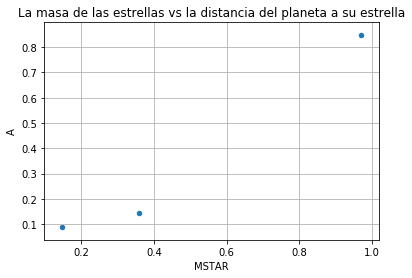

In [16]:
habitable.plot(kind="scatter",x="MSTAR",y="A",title = "La masa de las estrellas vs la distancia del planeta a su estrella",
              grid=True)

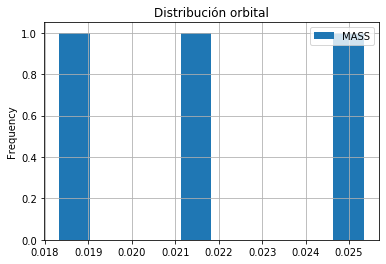

In [17]:
#La distribución orbital es como se distribuyen los planetas en su órbita, osea como
#la órbita se relaciona con masa de estos 
habitable.plot(kind="hist",x="A",y="MASS",title = "Distribución orbital",grid=True)

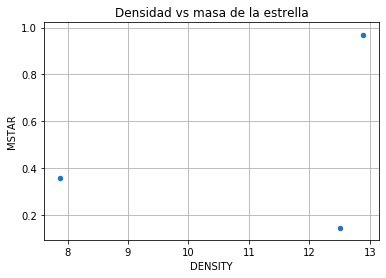

In [18]:
habitable.plot(kind="scatter",x="DENSITY",y="MSTAR",title = "Densidad vs masa de la estrella",grid=True)

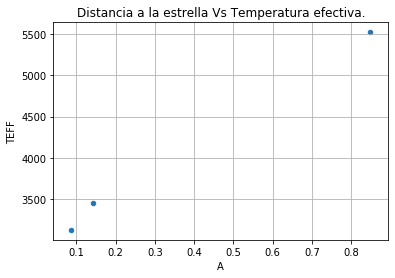

In [19]:
habitable.plot(kind="scatter",x="A",y="TEFF",title = "Distancia a la estrella Vs Temperatura efectiva.",grid=True)